In [176]:
# Import necessary libvraies
import numpy
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'1.13.0+cu116'

## 1. Create device agnostic code

In [177]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device is: {device}")

Using device is: cpu


## 2. Creating data

In [178]:
# Define know parameters
weight = 0.4
bias = 0.6

# Create dummy data using linear regression formula
start = 0
end = 1
step = 0.01

# Create feature data
features = torch.arange(start, end, step).unsqueeze(dim=1)

# Create Label data using linear regression formula
labels = weight * features + bias # y = w*x + b

features.shape, labels.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

## 3. Split data for train and test

In [179]:
train_split = int(0.8 * len(features))

x_train, y_train = features[:train_split], labels[:train_split]
x_test, y_test = features[train_split:], labels[train_split:]

#Check
len(x_train), len(y_train), len(x_test), len(y_test)

(80, 80, 20, 20)

### Let's create a function for visualize our train and test data

In [180]:
def plot_predictions(train_features = x_train,
                     train_labels = y_train,
                     test_features = x_test,
                     test_labels = y_test,
                     predictions = None):
  
  # Defire figure size
  plt.figure(figsize=(10, 5))

  # Plot train data in blue color
  plt.scatter(train_features, train_labels, c='b', s=4, label="Traning Data")

  # Plot test data in green color
  plt.scatter(test_features, test_labels, c='g', s=4, label="Testing Data")

  # If we have prediction values
  if predictions is not None:
    # Plot prediction data in red color
    plt.scatter(test_features, predictions, c='r', s=4, label="Prediction Data")

  # Create Legend
  plt.legend(prop={"size": 14})

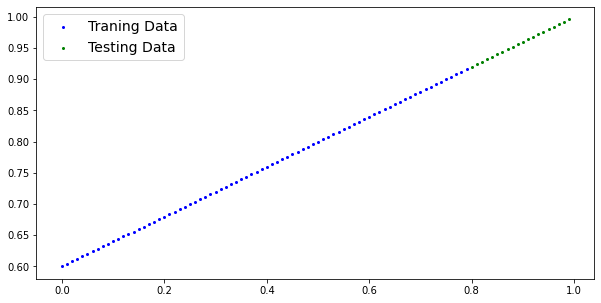

In [181]:
# Plot our train and test data
plot_predictions()

## 4. Create Model with PyTorch

In [182]:
# Our model is linear model
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    # Lets define our linear layer that will return initial values of our model parameter
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x:torch.Tensor)->torch.Tensor:
    return self.linear_layer(x)

###4.1 Create model object and check the model's initialized parameters

In [183]:
# Define manual seed
torch.manual_seed(42)

# Let's create instance or objcet
model = LinearRegressionModel()

# Check parameters
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [184]:
# Let's check curent device and move the model into our define device
# Current device
next(model.parameters()).device

device(type='cpu')

In [185]:
#Let's move the model into our define device
model.to(device)

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [186]:
# Agin check new device
next(model.parameters()).device

device(type='cpu')

## 5. Define Loss Function, Optimizer and Training

### 5.1 Define Loss Function and Optimizer

In [187]:
# Loss Function
loss_fn = nn.L1Loss()

# Optimizer
optimizer = torch.optim.SGD(params = model.parameters(), lr=0.01)

### 5.2 Training and Testing

In [188]:
# Let's define manual seed
torch.manual_seed(42)

# Let's create empty list to store some values
train_loss_values = []
test_loss_values = []
epoch_count = []

epochs = 200

# Put our train and test data to the target device
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)

# Create loop for training and testing
for epoch in range(epochs):

  ### Training
  # Keep model in the train mode
  model.train()

  # 1. Forward pass
  y_pred = model(x_train)

  # 2. Calculate loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero gradients
  optimizer.zero_grad()

  # 4. Back propagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ## Testing loop

  # Keep the model in evaluation mode
  model.eval()

  # Predict with the help of torch.inference_mode()
  with torch.inference_mode():

    # 1. Forward pass
    test_pred = model(x_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

    # Print out what happening
    if epoch % 10 == 0:
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      epoch_count.append(epoch)

      # print(f"Epoch: {epoch} | Train Loss: {loss} | Test Loss: {test_loss}")

      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.374000608921051 | MAE Test Loss: 0.5427345633506775 
Epoch: 10 | MAE Train Loss: 0.2583982050418854 | MAE Test Loss: 0.40738219022750854 
Epoch: 20 | MAE Train Loss: 0.14279580116271973 | MAE Test Loss: 0.2720298171043396 
Epoch: 30 | MAE Train Loss: 0.06010777875781059 | MAE Test Loss: 0.1617368757724762 
Epoch: 40 | MAE Train Loss: 0.04401451349258423 | MAE Test Loss: 0.11382672935724258 
Epoch: 50 | MAE Train Loss: 0.03954850137233734 | MAE Test Loss: 0.0945933535695076 
Epoch: 60 | MAE Train Loss: 0.036069106310606 | MAE Test Loss: 0.08453790843486786 
Epoch: 70 | MAE Train Loss: 0.032644037157297134 | MAE Test Loss: 0.0762024000287056 
Epoch: 80 | MAE Train Loss: 0.02921799197793007 | MAE Test Loss: 0.06821080297231674 
Epoch: 90 | MAE Train Loss: 0.025791948661208153 | MAE Test Loss: 0.06021923944354057 
Epoch: 100 | MAE Train Loss: 0.022366881370544434 | MAE Test Loss: 0.051883697509765625 
Epoch: 110 | MAE Train Loss: 0.018940825015306473 | MAE Test

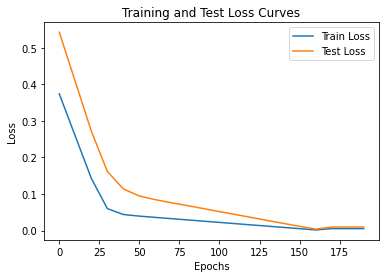

In [189]:
# Plot the loss curve
plt.plot(epoch_count, train_loss_values, label = "Train Loss")
plt.plot(epoch_count, test_loss_values, label = "Test Loss")
plt.title("Training and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

### 6. Make Prediction and Plot

In [190]:
# Make prediction
model.eval()
with torch.inference_mode():
  prediction = model(x_test)

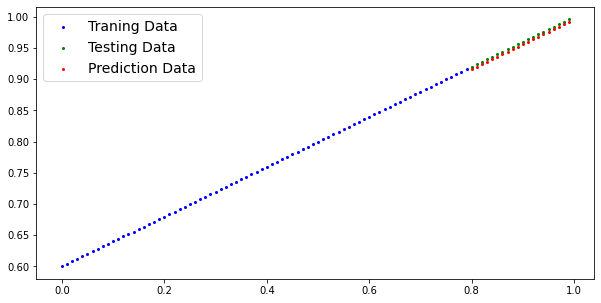

In [191]:
# Plot prediction
plot_predictions(predictions=prediction)

### 7. Save and load the model and predict again with saved model

### 7.1 Save the model using state_dict()

In [192]:
from pathlib import Path

# Create directory to save our model
DIRECTORY_NAME = Path("Models")
DIRECTORY_NAME.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "my_custom_model.pth"

SAVE_MY_MODEL = DIRECTORY_NAME/MODEL_NAME

print(SAVE_MY_MODEL)

Models/my_custom_model.pth


In [193]:
# Save our model to the above directory
print(f"My model successfully saved at: {SAVE_MY_MODEL}")
torch.save(obj = model.state_dict(), f=SAVE_MY_MODEL)

My model successfully saved at: Models/my_custom_model.pth


### 7.2 Load the model's parameters into a new instance

In [194]:
# Create new instance
loaded_model = LinearRegressionModel()

# Load saved state_dict()
loaded_model.load_state_dict(torch.load(SAVE_MY_MODEL))

# Pass our new loaded model into target device
loaded_model.to(device)

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [195]:
# Let's check parameters has beed loaded or not
loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.4030]])),
             ('linear_layer.bias', tensor([0.5935]))])

Yes, it's successfully loaded into the new loaded model

### 7.3 Let's make prediction with loaded model


In [196]:
# Turn model into evaluation mode
loaded_model.eval()

with torch.inference_mode():
  loaded_pred = loaded_model(x_test)

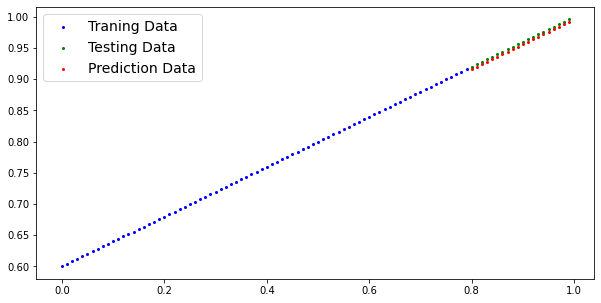

In [197]:
# Let's plot for visualization
plot_predictions(predictions=loaded_pred)

Finally, it properly working. Thanks **ZTM**